In [42]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import linregress

In [171]:
radius = pd.read_csv('radius.csv', index_col=0, parse_dates=True)

In [172]:
radius.head()

,60021,60023,60024,60025,60027,60002,60003,60001,60004,60006,60007,60018,60019,60017,60016,60015,60012,60013
2015-06-25 12:30:00,2.66044,13589.60000,2.66044,4288.80000,2.66044,NaN,NaN,NaN,NaN,NaN,NaN,3.97892,3.97892,3.97892,3.97892,3.97892,-2960.56,-3659.52
2015-06-25 13:00:00,2.66048,13585.60000,2.66048,4279.60000,2.66048,2.63844,2.63844,2.63844,2.63844,3.94492,3.50660,3.97892,3.97892,3.97892,3.97892,3.97892,-3608.44,-5562.80
2015-06-25 13:30:00,2.66044,2.65824,2.66044,2.66020,2.66044,2.63844,2.63844,2.63844,2.63844,3.72580,3.50664,3.97884,3.97884,3.97884,3.97884,3.97884,-3876.96,-5849.60
2015-06-25 14:00:00,2.66040,2.65820,2.66040,2.66016,2.66040,2.63844,2.63844,2.63844,2.63844,3.94492,3.72576,3.75784,3.97888,3.97888,3.97888,3.97888,-4281.60,-6322.00
2015-06-25 14:00:00,2.66040,2.65820,2.66040,2.66016,2.66040,2.63844,2.63844,2.63844,2.63844,17268.00000,9130.00000,3.75784,3.97888,3.97888,3.97888,3.97888,-4281.60,-6322.00


In [173]:
# DROP ALL BUT PRE-DAWN TIMES
# GROUP BY DAY, CALCULATE SLOPES
radius = radius[radius.index > pd.to_datetime('2016-07-03')]
radius = radius[radius.index < pd.to_datetime('2016-07-06')]
smoothRadius = radius.rolling(window=4, center=True).mean()
preDawnRadius= smoothRadius.between_time('00:00', '06:00', include_start=True, include_end=True)
preDawnRadius.insert(0, 'order', range(0,len(preDawnRadius)))
preDawnRadius.dropna(inplace=True)


C:\Users\wjh\Anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


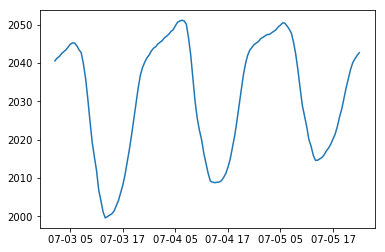

In [191]:
plt.plot(smoothRadius.index,smoothRadius['60004'])

(0, 200)

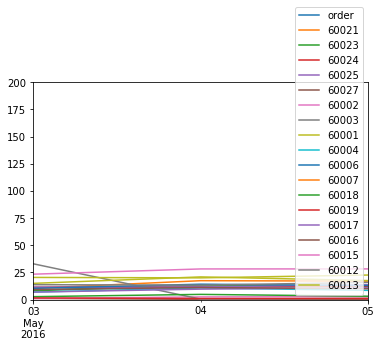

In [170]:
maximum = preDawnRadius.groupby(pd.TimeGrouper('D')).aggregate(np.max)
minimum = preDawnRadius.groupby(pd.TimeGrouper('D')).aggregate(np.min)
dif=maximum-minimum
dif.plot()
plt.ylim(0,200)

In [114]:
linregress(preDawnRadius.order, preDawnRadius['60001'])

LinregressResult(slope=3.9356651505472349, intercept=3603.7421572693461, rvalue=0.99596539350041124, pvalue=1.7216818090629144e-257, stderr=0.022701579506586932)

In [115]:
dayGrouped6001 = preDawnRadius.groupby(pd.TimeGrouper('D'))
slope60001 = preDawnRadius.groupby(pd.TimeGrouper('D')).agg(lambda v: linregress(v.order, v['60001'])[0])
# dayGrouped6001.aggregate(np.sum)
slope60002 = preDawnRadius.groupby(pd.TimeGrouper('D')).agg(lambda v: linregress(v.order, v['60002'])[0])
slope60004 = preDawnRadius.groupby(pd.TimeGrouper('D')).agg(lambda v: linregress(v.order, v['60004'])[0])
### GOOD PAIRINGS
### TREE  SVP  DENDRO
#   208 SVP11057 
# 206 SVP11056 60002
#205 SVP10733  60001
#207 SVP11090  60004
#207 SVP11085  60004
# slope60001

In [116]:
## Read in the metadata as a pandas dataframe
metadata = pd.read_csv('PISTON_DENDROMETER_METADATA.csv',sep=',', dtype=str)

#Create dictionaries between sensor ID and metadata info
Site = dict(zip(metadata['Micron Displacement DSID'], metadata['Site'] )) 
Slope = dict(zip(metadata['Micron Displacement DSID'], metadata['Slope'] )) 
Species = dict(zip(metadata['Micron Displacement DSID'], metadata['Species'] )) 
Tree = dict(zip(metadata['Micron Displacement DSID'], metadata['Tree #'] )) 


In [175]:
metadata

,Site,Tree #,Species,Slope,Side of Tree,Sensor ID,SE Channel Data Logger,EX Channel Data Logger,Data Logger Turn On Date,Data Logger Turn-on Time,Height Above Ground (m) (+/- 1 m),Notes,Include,Raw Voltage DSID,Micron Displacement DSID,Unnamed: 15,Unnamed: 16,Notes.1
0,Sagehorn,205,QUGA,S,NE,7,2,1,8/6/2015,18:49,3,NaN,no,50000,60000,NaN,NaN,We scraped away what we interpreted to be dead...
1,Sagehorn,205,QUGA,S,SW,27,4,2,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,yes,50001,60001,NaN,NaN,We threaded rods approximately 15 cm in total ...
2,Sagehorn,206,QUGA,S,SW,6,1,1,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,yes,50002,60002,NaN,NaN,NaN
3,Sagehorn,206,QUGA,S,E,23,3,2,8/6/2015,18:49,3,Threaded rods not srewed in all the way (yet)....,yes,50003,60003,NaN,NaN,NaN
4,Sagehorn,207,QUGA,S,E,43,6,3,8/6/2015,18:49,3,NaN,yes,50004,60004,NaN,NaN,NaN
5,Sagehorn,207,QUGA,S,NE,39,5,3,8/6/2015,18:49,3,NaN,no,50005,60005,NaN,NaN,NaN
6,Sagehorn,NT,QUGA,N,NW,26,4,2,8/6/2015,18:18,3,NaN,yes,50006,60006,NaN,NaN,NaN
7,Sagehorn,NT,QUGA,N,SE,3,6,3,8/6/2015,18:18,3,NaN,yes,50007,60007,NaN,NaN,NaN
8,Sagehorn,208,QUGA,N,N,5,2,1,8/6/2015,18:18,3,NaN,no,50008,60008,NaN,NaN,NaN
9,Sagehorn,208,QUGA,N,S,41,1,1,8/6/2015,18:18,3,NaN,no,50009,60009,NaN,NaN,NaN


In [117]:
level4d = pd.read_csv('..\\Sapflow\level4dSage.csv')

level4d['datetime'] = pd.to_datetime(level4d['datetime'])
level4d.set_index(['datetime'], drop=True, inplace=True)

## Read in the metadata as a pandas dataframe
metadataSapflow = pd.read_csv('..\Sapflow\Data\sapflowMetadata.csv',sep=',')
metadataSapflow.tail()
Display = metadataSapflow.set_index('CurrentSVP')['QUGA flag'].to_dict()


In [121]:
dailyMinSapflow = level4d.resample('D').min()
preDawnSapflow= level4d.between_time('00:00', '06:00', include_start=True, include_end=True)
sumPreDawnSapflow = preDawnSapflow.resample('D').sum()

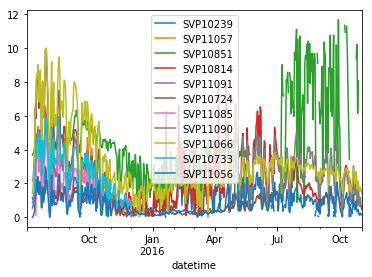

In [163]:
sumPreDawnSapflow.plot()

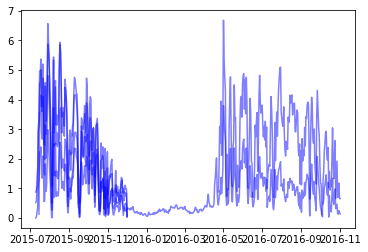

In [122]:
for column in sumPreDawnSapflow:
    if Display[column] == 'ok':
        ls = '-'
        c = 'b'
        plt.plot(sumPreDawnSapflow.index, 
        sumPreDawnSapflow[column], 
        color = c,
        linestyle = ls,
        alpha=0.5)


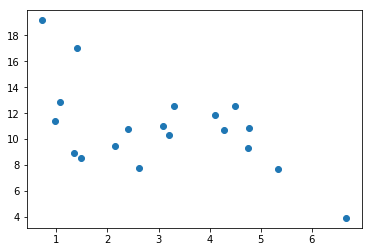

In [162]:

### TREE  SVP  DENDRO
#   208 SVP11057 
# 206 SVP11056 60002
#205 SVP10733  60001
#207 SVP11090  60004
#207 SVP11085  60004

merged = sumPreDawnSapflow.merge(dif,how='inner', left_index=True,right_index=True)
plt.scatter(merged['SVP11090'], merged['60004'])
# plt.ylim([-2,3])

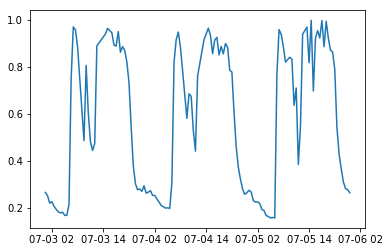

In [215]:

merged2 = level4d.merge(smoothRadius,how='inner', left_index=True,right_index=True)
merged2.interpolate(inplace=True)
# merged2.dropna(inplace=True)
plt.plot(merged2.index, merged2['SVP11090'])
# , merged['60004'])
# merged2

In [210]:
# merged